In [1]:
from Data.Population import *
from Data.Functionals import phi, theta
from Models import rect
from Genetic.Operators import *
import matplotlib.pyplot as plt
from time import time


In [2]:
#Etapa 00: Definições Iniciais:

xobs = np.linspace(-1000, 1000, 500)
zobs = np.zeros(len(xobs))
model = rect( -100,100,300,900,2 )
model_gz = model.Gz(xobs, zobs)
model_gz_noised = model.addnoise()
xmin, xmax = -1000.0, 1000.0
ymin, ymax = 200, 800.0
min_bounds = [xmin, ymin, 1e5]
max_bounds = [xmax, ymax, 1e10]
nfontes = 20
nind = 5
pmut = 0.1
ngera = int( 500 )
mu = 0.04
guardatheta = [ ]

Geração 0
Geração 1
34.1347412749776
Geração 2
Geração 3
Geração 4
Geração 5
27.38111343105721
Geração 6
13.838445320300252
Geração 7
Geração 8
Geração 9
Geração 10
Geração 11
Geração 12
Geração 13
Geração 14
Geração 15
Geração 16
Geração 17
Geração 18
Geração 19
Geração 20
Geração 21
Geração 22
Geração 23
Geração 24
Geração 25
Geração 26
Geração 27
Geração 28
Geração 29
Geração 30
Geração 31
Geração 32
Geração 33
Geração 34
Geração 35
Geração 36
Geração 37
Geração 38
Geração 39
Geração 40
Geração 41
Geração 42
Geração 43
Geração 44
Geração 45
Geração 46
Geração 47
Geração 48
Geração 49
Geração 50
Geração 51
Geração 52
Geração 53
Geração 54
Geração 55
Geração 56
Geração 57
Geração 58
Geração 59
Geração 60
Geração 61
Geração 62
Geração 63
Geração 64
Geração 65
Geração 66
Geração 67
Geração 68
Geração 69
Geração 70
Geração 71
Geração 72
Geração 73
Geração 74
Geração 75
Geração 76
Geração 77
Geração 78
Geração 79
Geração 80
Geração 81
Geração 82
Geração 83
Geração 84
Geração 85
Geração 86

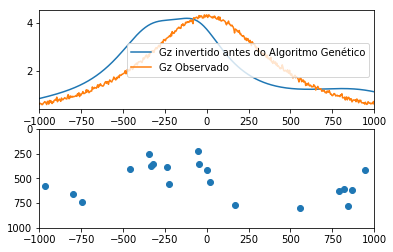

In [3]:

t1 = time( )
guardafit = [ ]
#Etapa 01: Inicialização da População:

pop = Fontes( )
pop.Gera( min_bounds, max_bounds, nfontes, nind )
fontes = pop.asArray( )
gz_fonts = pop.Gz( xobs, zobs )


#Etapa 02: Avaliação da População Inicial:
fit = phi( model_gz_noised, gz_fonts, 'L2', fontes , mu)

iwinner = np.argmin( fit )
best =  fontes[ iwinner ]
melhor = fit[ np.argmin( fit ) ]

plt.figure( )

plt.subplot(211)
plt.plot( xobs, gz_fonts[iwinner] ,label = 'Gz invertido antes do Algoritmo Genético')
plt.plot( xobs, model_gz_noised , label = 'Gz Observado')
plt.legend( )

plt.xlim(-1000,1000)
plt.subplot(212)
plt.scatter( best[:,0], best[:,1] )
plt.xlim( -1000, 1000)
plt.ylim(0,1000)
plt.gca().invert_yaxis()

plt.savefig('Geracao_0.png')
c = 0

for i in range( ngera ):

    c += 1
    print(f'Geração {i}')
    # Etapa 03: Selecao dos pais (roleta viciada)

    pais = operator( 'Roleta', np.array( fit ) )


    # Etapa 04: Definicao da subpopulacao para o cruzamento:

    popcruz = [ ]

    for pai in pais:
        popcruz.append( fontes[ pai ] )


    # Etapa 05: Cruzamento para criacao dos filhos:
    filhos = operator( 'Cruzamento', popcruz )


    # Etapa 06: Aplicacao de mutacao em alguns individuos da populacao de filhos:

    filhos = operator( 'Mutacao', filhos, pmut, min_bounds, max_bounds )
    gz_fonts = pop.Gz( xobs, zobs, pop.Gera_from_Existing( filhos ) )


    # Etapa 07: Calculo das aptidoes dos filhos:

    fit_filhos = phi( model_gz_noised, gz_fonts, 'L2', filhos, mu )
    
    
    # Etapa 08: Elitismo para colocar os filhos na populacao original:
    fontes, fit = operator( 'Elitismo', fontes, fit, filhos, fit_filhos )
    
    novotheta = theta( 'L2', fontes )

    guardafit.append( fit[ np.argmin( fit ) ] )
    guardatheta.append( novotheta[ np.argmin( fit ) ] )
    
    if fit[ np.argmin( fit ) ] < melhor:
        c = 0
        print( fit[np.argmin( fit ) ] )
        melhor = fit[ np.argmin( fit ) ]

    if c >= 10000:
        break



In [4]:
print( f'Melhor: { fit[ np.argmin( fit ) ] }' )
print( f'Tempo Total { time() - t1 }' )
# Etapa 09: convergencia:

iwinner = np.argmin( fit )
best =  fontes[ iwinner ]

b = pop.Gera_from_Existing([best])
print( best )
gz_best = 0
for b in b:
    for i in b:
        gz_best += i.Gz( xobs, zobs)


Melhor: 13.838445320300252
Tempo Total 1972.0781376361847
[[ 1.57438995e+02  5.57113518e+02  8.30024943e+09]
 [-6.93988588e+01  3.62015108e+02  8.30024943e+09]
 [-7.57278555e+01  3.36664732e+02  8.30024943e+09]
 [ 1.19452258e+01  5.46354645e+02  8.30024943e+09]
 [-3.20396636e+00  5.48623907e+02  8.30024943e+09]
 [ 2.54747816e+02  5.98338531e+02  8.30024943e+09]
 [ 3.55025886e+01  7.34731834e+02  8.30024943e+09]
 [-1.21043559e+02  6.62021040e+02  8.30024943e+09]
 [ 3.06978444e+02  6.07029615e+02  8.30024943e+09]
 [-7.24311877e+00  7.35997938e+02  8.30024943e+09]
 [-2.52626941e+02  6.70131514e+02  8.30024943e+09]
 [ 2.95112276e+00  4.14875939e+02  8.30024943e+09]
 [-1.87968644e+02  4.24281211e+02  8.30024943e+09]
 [-2.02331511e+01  3.06429028e+02  8.30024943e+09]
 [ 2.50042400e+02  4.66339726e+02  8.30024943e+09]
 [ 6.35182629e+01  3.41684017e+02  8.30024943e+09]
 [ 1.01068043e+02  7.79616405e+02  8.30024943e+09]
 [ 7.57565841e-01  4.00595742e+02  8.30024943e+09]
 [ 3.29509610e+01  4.073

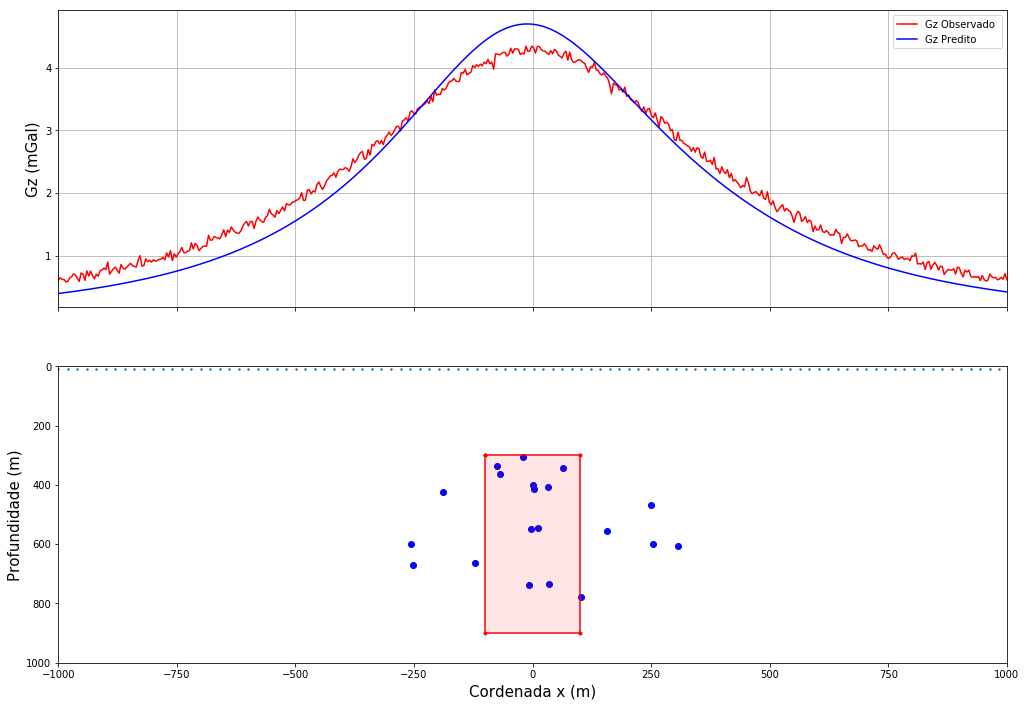

In [5]:
figure, (ax1,ax2) = plt.subplots( nrows = 2, ncols = 1,figsize=(17,12), facecolor='w', sharex = True , squeeze= True)

ax1.plot( xobs, model_gz_noised , 'r-', label = 'Gz Observado ')
ax1.plot( xobs, gz_best ,  'b-', label = 'Gz Predito ')
ax1.legend( )
ax1.set_ylabel('Gz (mGal)', fontsize = 15)
ax1.set_xlim(-1000,1000)
ax1.grid( )


ax2.scatter( best[:,0], best[:,1],color = 'blue' )
ax2.plot([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
             [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], ".-r")

plt.fill_between([model.params[0], model.params[0], model.params[1], model.params[1], model.params[0]], \
                         [model.params[2], model.params[3], model.params[3], model.params[2], model.params[2]], facecolor = 'red', alpha = 0.1)

ax2.scatter( xobs[0:-1:5], zobs[0:-1:5]+10, s = 2)
ax2.set_ylabel('Profundidade (m)', fontsize = 15)
ax2.set_ylim(0,1000)
ax2.set_xlabel( 'Cordenada x (m)', fontsize = 15)
ax2.invert_yaxis()


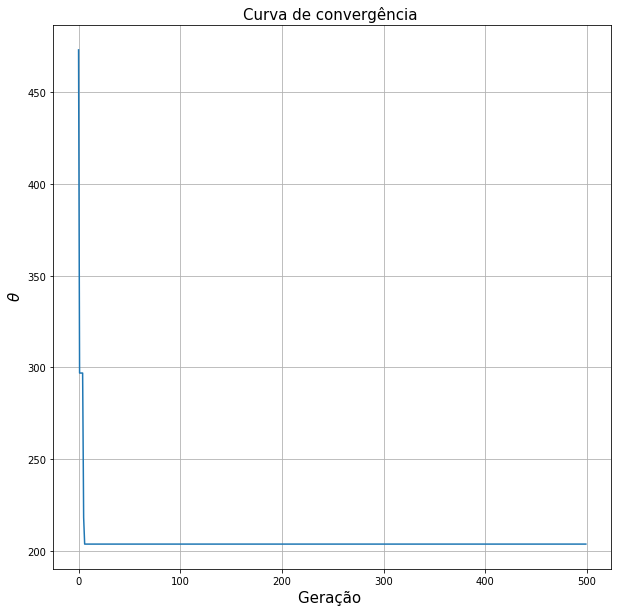

In [7]:
plt.figure( figsize=(10,10), facecolor='w')
plt.title( 'Curva de convergência ', fontsize = 15)
plt.plot( range( ngera ), guardatheta)
plt.xlabel('Geração ', fontsize = 15)
plt.ylabel( r' $\theta$ ', fontsize = 15)
plt.grid()
plt.show()